# ApproxPolyDp() Function

In [ ]:
# approx = cv2.approxPolyDP(counter, epsilon ,True ) # 0.02* perimeter
"""
shape  length   epsilon
-----------------------
triangle 3       0.02*perimeter
rectangle 4      0.02*perimeter
pentagon 5      0.02*perimeter
circle   many    0.01*perimeter
 

"""




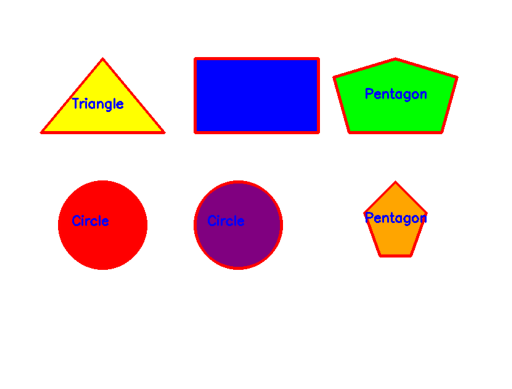

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
# load image
img = cv2.imread('shape2.png')
# convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# apply binary thresholding
_, thresh = cv2.threshold(gray, 240, 255, cv2.THRESH_BINARY_INV)
# find contours
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
# draw contours
cv2.drawContours(img, contours, -1, (0, 2, 255), 3)
# loop through contours and identify shapes
for contour in contours:
    # calculate perimeter
    perimeter = cv2.arcLength(contour, True)
    # approximate the contour
    approx = cv2.approxPolyDP(contour, 0.02 * perimeter, True)
    # identify shape based on number of vertices
    if len(approx) == 3:
        shape_name = "Triangle"
    elif len(approx) == 4:
        shape_name = "Quadrilateral"
    elif len(approx) == 5:
        shape_name = "Pentagon"
    else:
        shape_name = "Circle"
    # get the center of the shape for text placement
    M = cv2.moments(contour)
    if M["m00"] != 0:
        cX = int(M["m10"] / M["m00"])
        cY = int(M["m01"] / M["m00"])
    else:
        cX, cY = 0, 0
    # put shape name on the image
    cv2.putText(img, shape_name, (cX - 50, cY), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 0, 0),  2)
# display image
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show() #pass krte hai 

In [ ]:
## issko ek baar ur smjhna hai 